In [1]:
%matplotlib inline

# Linear regression

We are going to look at the relationship between age and
minutes played.


Either work through the code at the same time as watching or afterwards.

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os

## Opening data
In this example we use data downloaded from [FBref](https://fbref.com/en/comps/12/2021-2022/stats/2021-2022-La-Liga-Stats) on players in La Liga.
We just use the age and minutes played columns.
And we only take the first 20 observations, to help visualise the process.
Download [playerstats.csv](https://github.com/soccermatics/Soccermatics/blob/main/course/lessons/lesson2/playerstats.csv)
your working directory.



In [3]:
num_obs=20
path = os.path.join('..', 'data', 'FBref', 'playerstats.csv')
laliga_df = pd.read_csv(path, delimiter=',')
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df['Min'][0:num_obs])
minutes_model = minutes_model.assign(age=laliga_df['Age'][0:num_obs])

# Make an age squared column so we can fir polynomial model.
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df['Age'][0:num_obs],2))

## Plotting the data
Start by plotting the data.



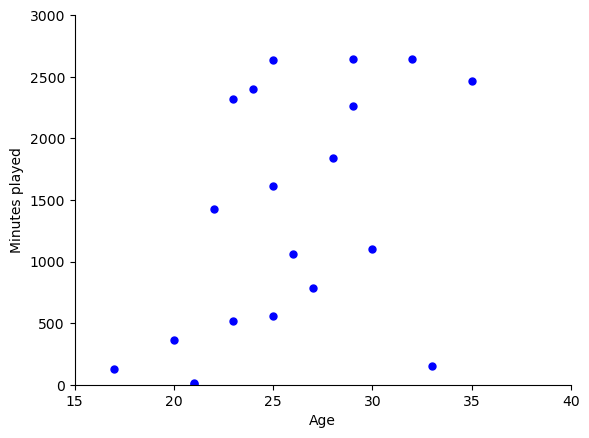

In [4]:
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
plt.show()

If there were no relationship between Minutes played and Age we would see something like this:

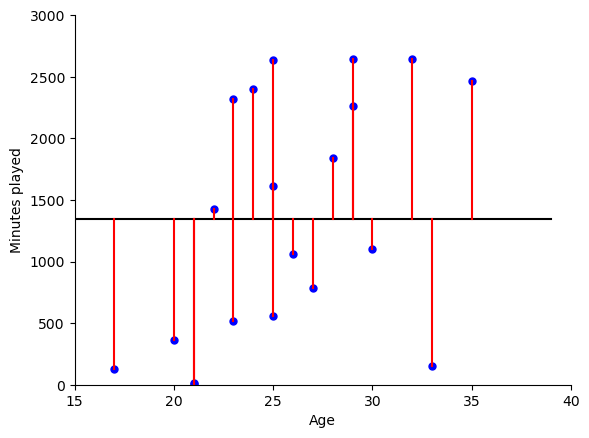

In [5]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the straight line through the data
x = np.arange(40,step=1)
y = np.mean(minutes_model['minutes'])*np.ones(40)
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], np.mean(minutes_model['minutes'])], color='red')
plt.show()

## Fitting the model
We are going to begin by doing a  straight line linear regression

$$y = b_0 + b_1 x$$

A straight line relationship between minutes played and age.



In [6]:
model_fit=smf.ols(formula='minutes ~ age', data=minutes_model).fit()
print(model_fit.summary())        
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Sun, 24 Sep 2023   Prob (F-statistic):             0.0318
Time:                        15:19:55   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

Comparing the fit 
 ----------------------------
We now use the fit to plot a line through the data.
where the parameters are estimated from the model fit.

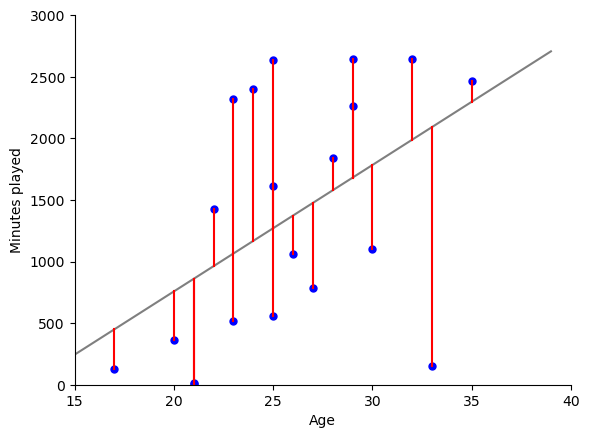

In [7]:
# First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

# Now create the line through the data
x = np.arange(40,step=1)
y = b[0] + b[1]*x
ax.plot(x, y, color='black', alpha=.5)


# Show distances to line for each point
for i, a in enumerate(minutes_model['age']):
    ax.plot([a,a], [minutes_model['minutes'][i], b[0] + b[1]*a], color='red')
plt.show()

A model including squared terms
 ----------------------------
We now fit the quadratic model

$$y = b_0 + b_1 x + b_2 x^2$$

estimating the parameters from the data.



                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Sun, 24 Sep 2023   Prob (F-statistic):             0.0512
Time:                        15:19:55   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

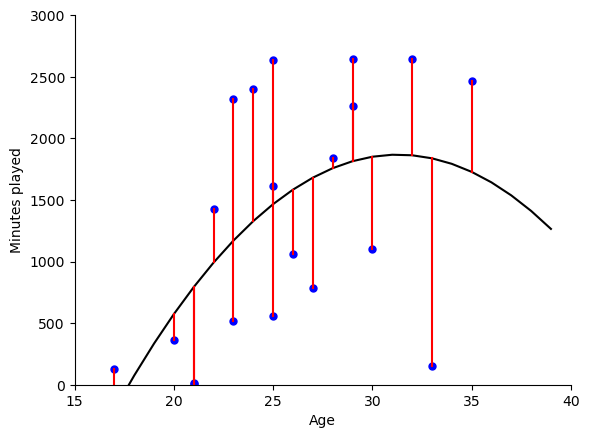

In [8]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())        
b=model_fit.params

# Compare the fit 
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x = np.arange(40,step=1)
y = b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a], [minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
plt.show()

## Now try with all data points
1) Refit the model with all data points

2) Try adding a cubic term

3) Think about how well the model works. What are the limitations?

